In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()
# Switch values and keys. Now IDs are the keys
word_index = dict([(value, key )for (key, value) in word_index.items()])

In [4]:
for _ in train_data[0]:
    # The first three indexes are reserved words
    print(word_index.get(_ - 3))


None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [5]:
# Keras only receives tensors

def vectorize(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1

    return results

In [6]:
X_train = vectorize(train_data)
x_test = vectorize(test_data)

X_train.shape

(25000, 10000)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Training model

In [8]:
model = models.Sequential()
### Generative and images use other type of layer
### Dense layer is used for text
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# We use sigmoid because we want to know the probabilites between 0 and 1
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [10]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1539 - accuracy: 0.9525 - val_loss: 0.2755 - val_accuracy: 0.8895
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1282 - accuracy: 0.9609 - val_loss: 0.2936 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1074 - accuracy: 0.9674 - val_loss: 0.2985 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0909 - accuracy: 0.9742 - val_loss: 0.3425 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0755 - accuracy: 0.9793 - val_loss: 0.3477 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0634 - accuracy: 0.9838 - val_loss: 0.3630 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0506 - accuracy: 0.9879 - val_loss: 0.4223 - val_accuracy: 0.8658
Epoch 8/20
30/

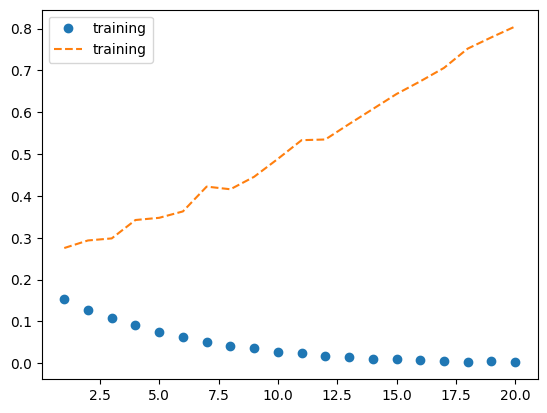

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='training')
plt.legend()
plt.show()

In [16]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 0s 490us/step - loss: 0.8698 - accuracy: 0.8493


[0.869766891002655, 0.8493199944496155]

In [17]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.8401 - val_accuracy: 0.8651
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.8699 - val_accuracy: 0.8630
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.9153 - val_accuracy: 0.8614
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 8.2438e-04 - accuracy: 0.9999 - val_loss: 0.9303 - val_accuracy: 0.8607
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.9763 - val_accuracy: 0.8611
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 5.1624e-04 - accuracy: 0.9999 - val_loss: 0.9908 - val_accuracy: 0.8606
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 4.1721e-04 - accuracy: 0.9999 - val_loss: 1.0248 - val_accuracy: 0.8597
Ep